# Data Exploration - Partidos Internacionales Fútbol

In [6]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":14,"axes.titlesize":24,"axes.labelsize":24})   

# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = (20,10)

Let's load the FIFA dataset

In [7]:
fifa = pd.read_csv('results.csv')

fifa.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [8]:
fifa.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
38919,2018-03-27,Yemen,Nepal,2,1,AFC Asian Cup qualification,Doha,Qatar,True
38920,2018-04-01,Malaysia,Bhutan,7,0,Friendly,Kuala Lumpur,Malaysia,False
38921,2018-04-18,Trinidad and Tobago,Panama,0,1,Friendly,Couva,Trinidad and Tobago,False
38922,2018-04-18,Zimbabwe,Botswana,0,1,Friendly,Harare,Zimbabwe,False
38923,2018-04-26,St. Kitts and Nevis,Jamaica,1,3,Friendly,Basseterre,St. Kitts and Nevis,False
38924,2018-04-30,Antigua and Barbuda,Jamaica,0,2,Friendly,St. John's,Antigua and Barbuda,False
38925,2018-05-08,Iraq,Palestine,0,0,Friendly,Basra,Iraq,False
38926,2018-05-09,Algeria,Saudi Arabia,0,2,Friendly,Cádiz,Spain,True
38927,2018-05-11,Kuwait,Palestine,2,0,Friendly,Kuwait City,Kuwait,False
38928,2018-05-15,Saudi Arabia,Greece,2,0,Friendly,Seville,Spain,True


In [9]:
fifa.describe()

,home_score,away_score
count,38929.000000,38929.000000
mean,1.741247,1.180611
std,1.731551,1.379373
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Selección de Info general

In [10]:
fifaFechas = pd.DataFrame(fifa["date"].str.split('-',2).tolist(),
                                   columns = ['year','month','day'])

In [11]:
fifaCompleto = fifa.join(fifaFechas)
fifaCompleto = fifaCompleto.drop("date", axis=1)
fifaCompleto.head(5)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,England,Scotland,4,2,Friendly,London,England,False,1873,03,08
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,07
3,England,Scotland,2,2,Friendly,London,England,False,1875,03,06
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,04


In [29]:
d = widgets.Dropdown(options=['home_team','home_score','away_score', 'away_team', 'tournament', 'city', 'country','neutral','year','month','day'], value='home_team')
d

Dropdown(options=('home_team', 'home_score', 'away_score', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month', 'day'), value='home_team')

In [30]:
e = widgets.Dropdown(options=[10,20,30,40,50], value=10)
e

Dropdown(options=(10, 20, 30, 40, 50), value=10)

In [31]:
fifaCompleto[d.value].value_counts().head(e.value)

06    5253
10    4311
09    3943
11    3927
03    3903
05    3121
08    2673
02    2548
04    2514
07    2451
Name: month, dtype: int64

In [215]:
df_filtered = fifaCompleto.query('home_score>30')
df_filtered

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
23569,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,04,11


In [32]:
df_filtered2 = fifaCompleto.query('tournament=="FIFA World Cup"')
df_filtered2

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
1277,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,07,13
1278,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,07,13
1279,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,07,14
1280,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,07,14
1281,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,07,15
1282,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True,1930,07,16
1283,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True,1930,07,17
1284,Paraguay,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,07,17
1286,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,1930,07,18
1287,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,1930,07,19


# Visualización general

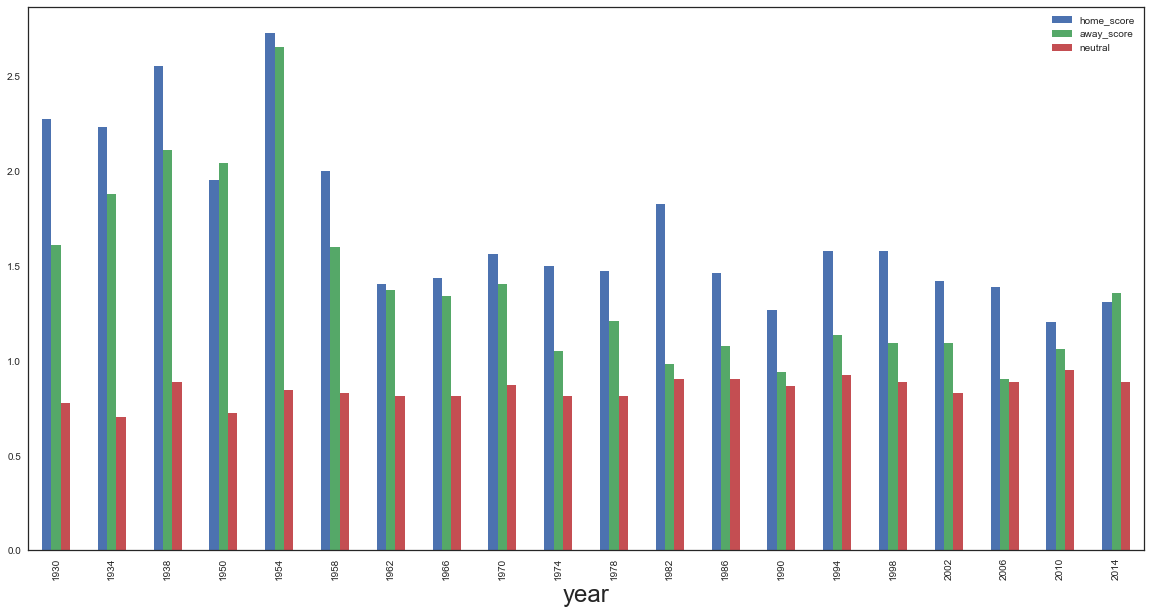

In [33]:
plt.figure(figsize=(20, 26))
iris_gb=df_filtered2.groupby(['year']).mean()
iris_gb.plot(kind='bar')

We can plot the distribution for each class.

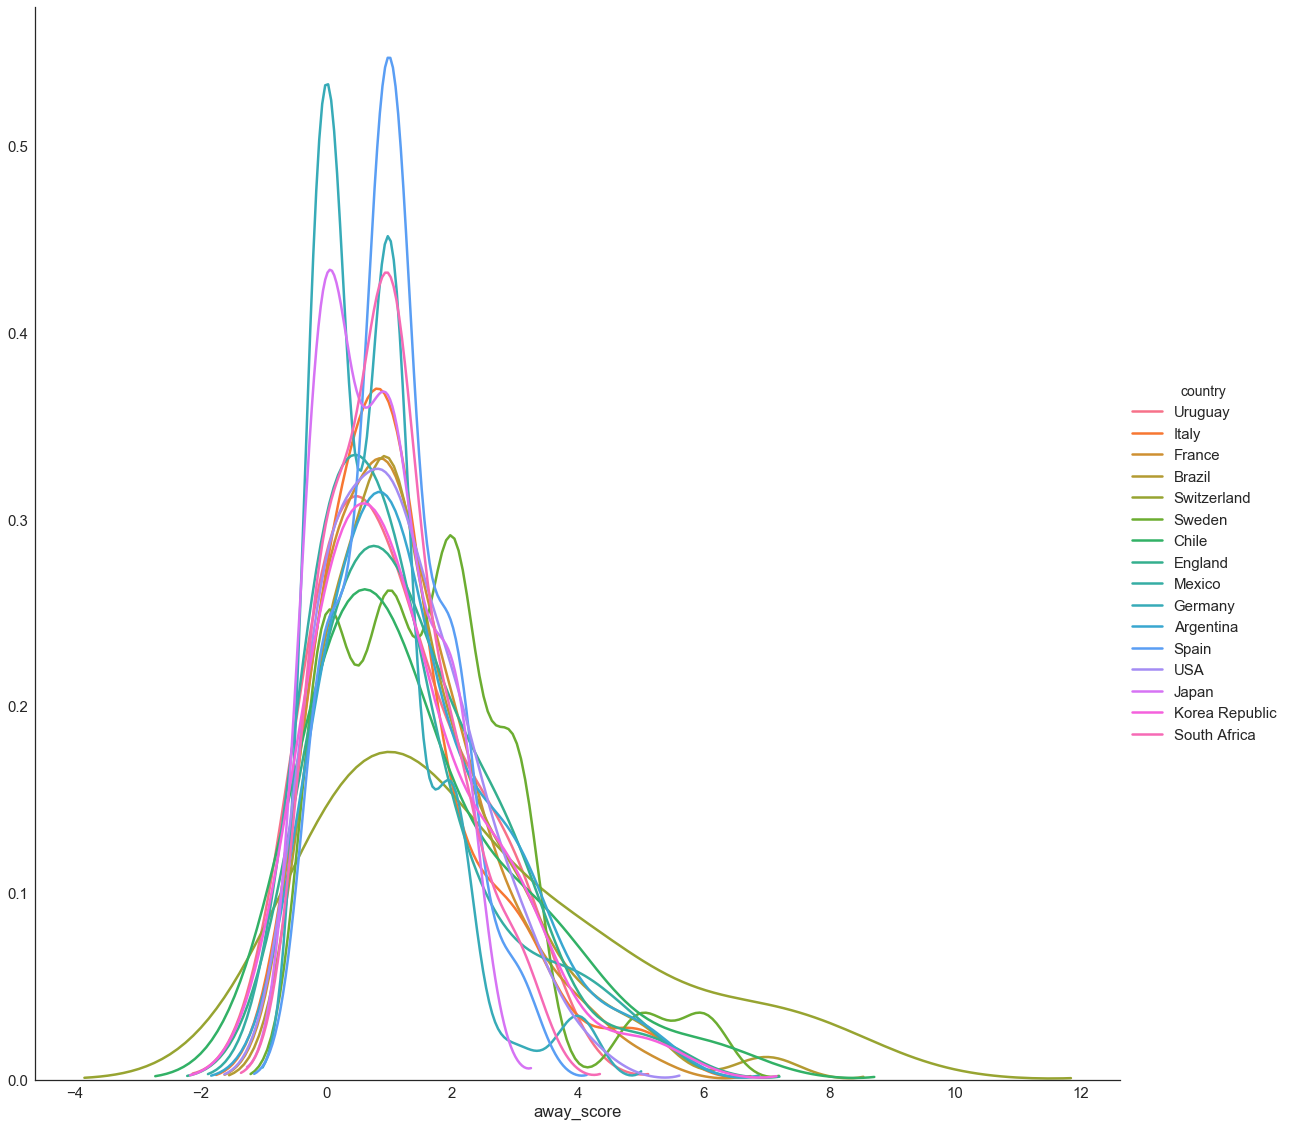

In [227]:
sns.FacetGrid(df_filtered2, hue="country", size=16) \
   .map(sns.kdeplot, "away_score") \
   .add_legend()

And now we use scatter plots.

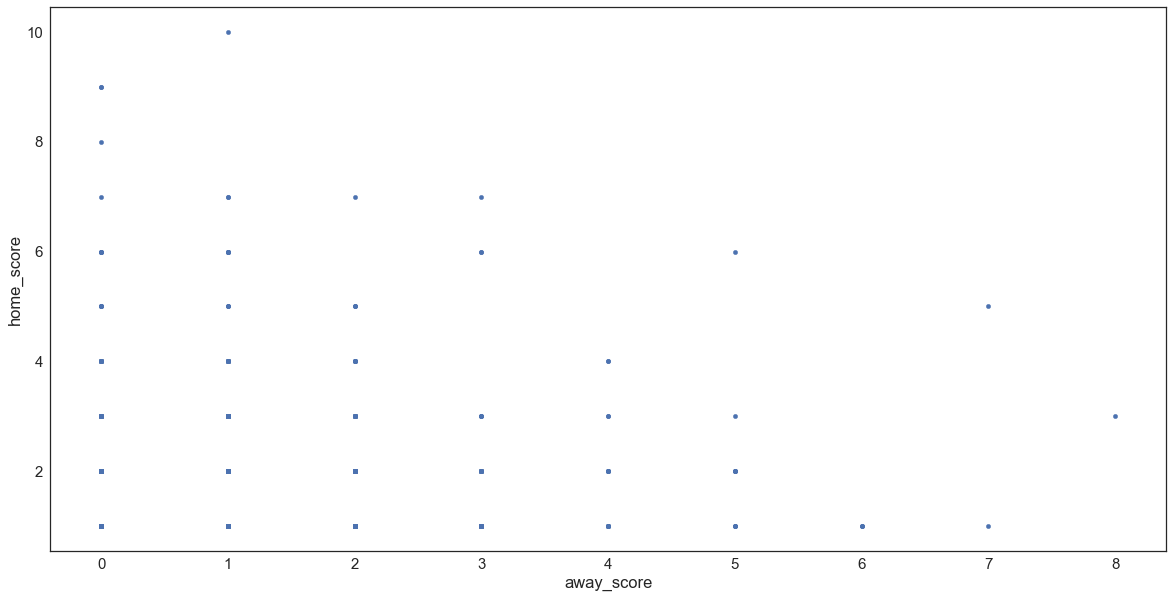

In [229]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
df_filtered2.plot(kind="scatter", x="away_score", y="home_score")

We can also add the information about the class.

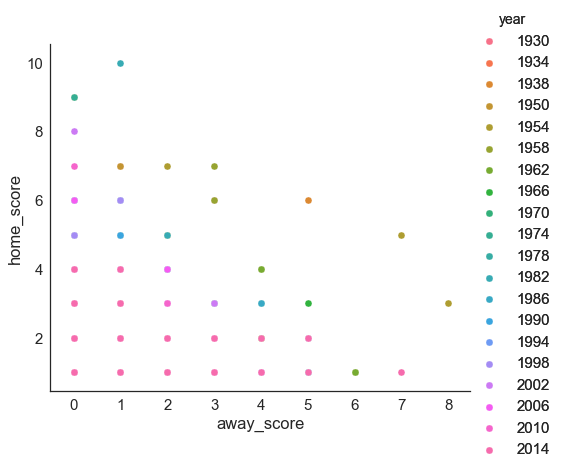

In [228]:
sns.pairplot(df_filtered2, x_vars=["away_score"], y_vars=["home_score"], hue="year", size=6) \
   .add_legend()

We can combine histograms and histograms in the same figure.

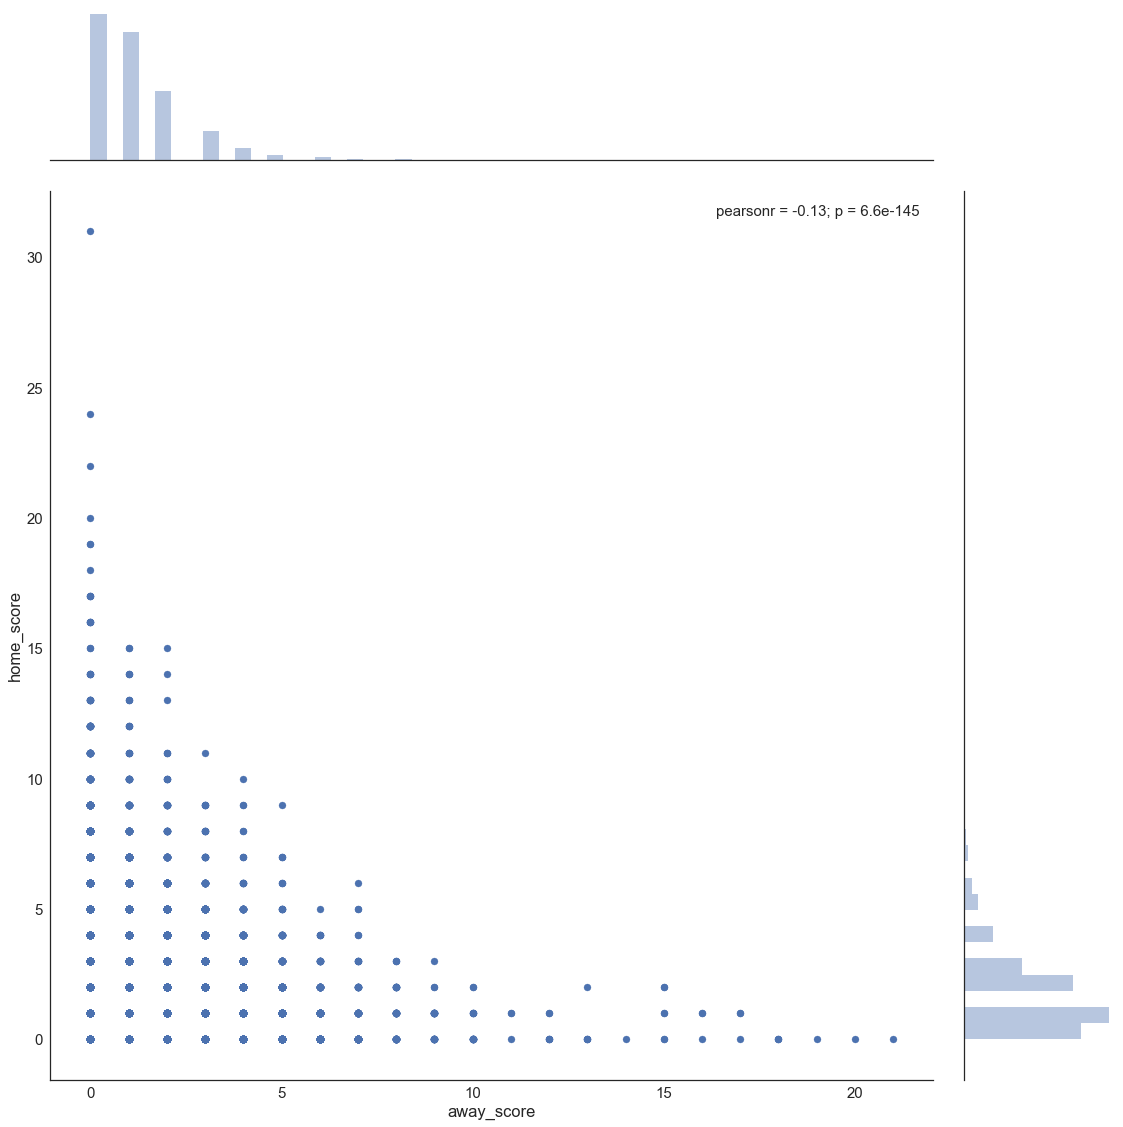

In [222]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.jointplot(x="away_score", y="home_score", data=fifaCompleto, size=16)

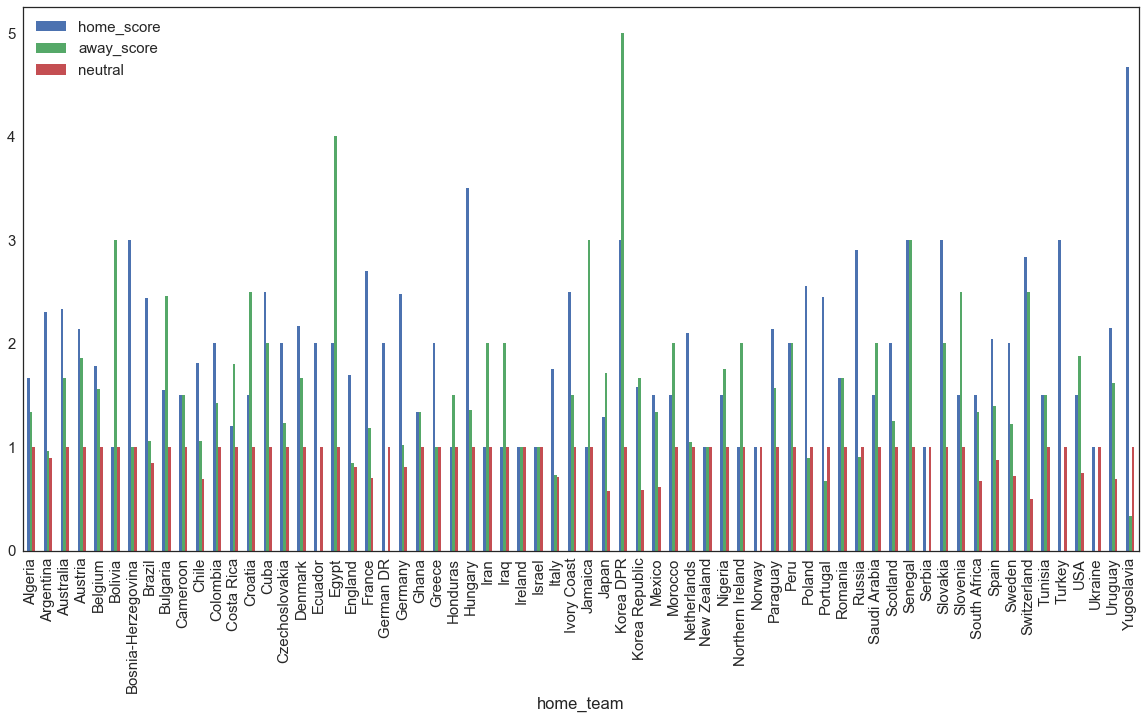

In [224]:
plt.figure(figsize=(20, 26))
iris_gb2=df_filtered2.groupby(['home_team']).mean()
iris_gb2.plot(kind='bar')

## Principal Component Analysis

So far we used only some data dimensions for visualization. We now apply Principal Component Analysis to project the four original dimensions into a two dimensional space.

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values

Principal component analysis is affected by attribute scale so we normalize all the attributes by eliminating the mean and scaling to unit variance.

In [27]:
x = StandardScaler().fit_transform(x)

In [28]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(x)
pca_iris = pd.DataFrame(data = new_data, 
                        columns = ['principal component 1', 'principal component 2'])

In [29]:
pca_iris_complete = pca_iris
pca_iris_complete['Species'] = iris[['Species']]

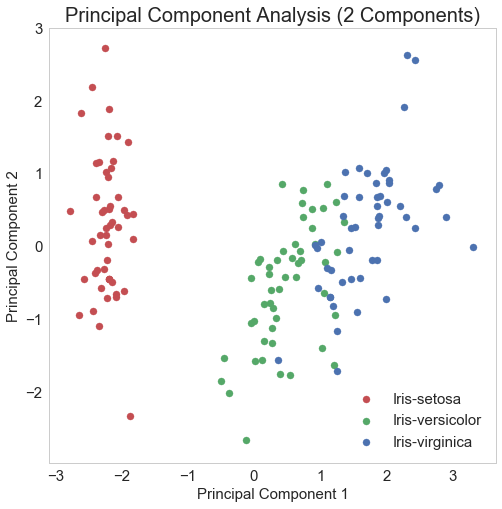

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis (2 Components)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_iris_complete['Species'] == target
    ax.scatter(pca_iris_complete.loc[indicesToKeep, 'principal component 1']
               , pca_iris_complete.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))


Explained Variance
   Component 1 0.73
   Component 2 0.23
   Total Explained Variance 0.96


In [32]:
print("Components")
for i,c in enumerate(pca.components_):
    print("Component %d\t%s"%(i,str(c)))

Components
Component 0	[ 0.52237162 -0.26335492  0.58125401  0.56561105]
Component 1	[0.37231836 0.92555649 0.02109478 0.06541577]


In [36]:
data = np.dot(x,np.transpose(pca.components_))
data[:5,:]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [37]:
pca_iris.head(5)

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


We can apply PCA with the same number of components as the 

In [38]:
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values
full_pca = PCA()
fitted = full_pca.fit_transform(x)
full_pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

# t-SNE

In [63]:
from sklearn.manifold import TSNE

perplexity=80
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300, random_state=1)
# tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_result = tsne.fit_transform(x)

[t-SNE] Computing 149 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 1.545674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.617229
[t-SNE] Error after 300 iterations: 0.028260


In [64]:
iris_tsne = pd.DataFrame({'x':tsne_result[:,0], 'y':tsne_result[:,1], 'Species':iris['Species']})

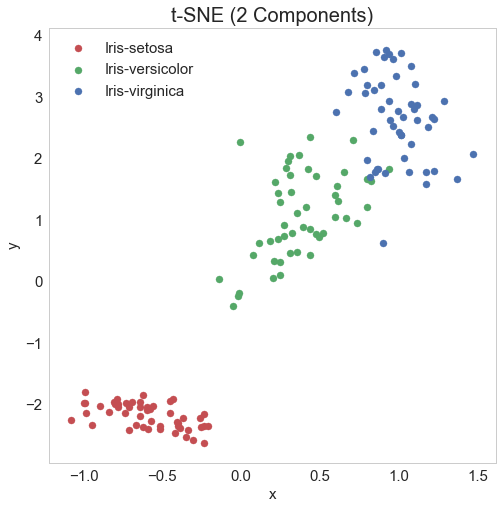

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title('t-SNE (2 Components)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_tsne['Species'] == target
    ax.scatter(iris_tsne.loc[indicesToKeep,'x'], iris_tsne.loc[indicesToKeep,'y'], c=color, s=50)
ax.legend(targets)
ax.grid()